In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced


In [4]:
# Read the CSV and Perform Basic Data Cleaning
df1=pd.read_csv("STSI Combined .csv")
df2=pd.read_csv("Table 1 Combined.csv")
df1.head()

,Year,State,Total Fatalities,Alcohol-Impaired Driving Fatalities (BAC,Unnamed: 4,Unnamed: 5
0,2016,Alabama,1083,298,27,0.43
1,2017,Alabama,948,265,28,0.37
2,2018,Alabama,953,249,26,0.35
3,2019,Alabama,930,272,29,0.38
4,2020,Alabama,934,236,25,0.35


In [5]:
df2.head()

,Year,State,Fatalities,Total Vehicle Miles Traveled (Millions),Fatalities Per 100 Million Vehicle Miles Traveled,Total Population,"Fatalities Per 100,000 Population"
0,2020,Alabama,934,67921,1.38,4921532,18.98
1,2019,Alabama,930,71735,1.30,4907965,18.95
2,2018,Alabama,953,71167,1.34,4891628,19.48
3,2017,Alabama,948,70677,1.34,4877989,19.43
4,2016,Alabama,1083,69227,1.56,4866824,22.25


In [6]:
# create a dictionary of states.
clean_df=df2.merge(df1, on=["Year", "State"], how="left")
clean_df

,Year,State,Fatalities,Total Vehicle Miles Traveled (Millions),Fatalities Per 100 Million Vehicle Miles Traveled,Total Population,"Fatalities Per 100,000 Population",Total Fatalities,Alcohol-Impaired Driving Fatalities (BAC,Unnamed: 4,Unnamed: 5
0,2020,Alabama,934,67921,1.38,4921532,18.98,934,236,25,0.35
1,2019,Alabama,930,71735,1.30,4907965,18.95,930,272,29,0.38
2,2018,Alabama,953,71167,1.34,4891628,19.48,953,249,26,0.35
3,2017,Alabama,948,70677,1.34,4877989,19.43,948,265,28,0.37
4,2016,Alabama,1083,69227,1.56,4866824,22.25,1083,298,27,0.43
...,...,...,...,...,...,...,...,...,...,...,...
245,2020,Wyoming,127,9800,1.30,582328,21.81,127,44,34,0.44
246,2019,Wyoming,147,10208,1.44,580116,25.34,147,33,23,0.33
247,2018,Wyoming,111,10438,1.06,579054,19.17,111,36,32,0.34
248,2017,Wyoming,123,9785,1.26,579994,21.21,123,46,38,0.47


In [7]:
clean_df['Number Alcohol-Impaired Fatalities']=clean_df['Alcohol-Impaired Driving Fatalities (BAC'] 
clean_df['Percent Alcohol-Impaired Fatalities']=clean_df['Unnamed: 4'] 
clean_df['Alcohol-Impaired Fatalities Per 100 Mill VMT']=clean_df['Unnamed: 5']
clean_df.head() 

,Year,State,Fatalities,Total Vehicle Miles Traveled (Millions),Fatalities Per 100 Million Vehicle Miles Traveled,Total Population,"Fatalities Per 100,000 Population",Total Fatalities,Alcohol-Impaired Driving Fatalities (BAC,Unnamed: 4,Unnamed: 5,Number Alcohol-Impaired Fatalities,Percent Alcohol-Impaired Fatalities,Alcohol-Impaired Fatalities Per 100 Mill VMT
0,2020,Alabama,934,67921,1.38,4921532,18.98,934,236,25,0.35,236,25,0.35
1,2019,Alabama,930,71735,1.30,4907965,18.95,930,272,29,0.38,272,29,0.38
2,2018,Alabama,953,71167,1.34,4891628,19.48,953,249,26,0.35,249,26,0.35
3,2017,Alabama,948,70677,1.34,4877989,19.43,948,265,28,0.37,265,28,0.37
4,2016,Alabama,1083,69227,1.56,4866824,22.25,1083,298,27,0.43,298,27,0.43


In [8]:
clean_df.columns

Index(['Year', 'State', 'Fatalities',
       'Total Vehicle Miles Traveled (Millions)',
       'Fatalities Per 100 Million Vehicle Miles Traveled', 'Total Population',
       'Fatalities Per 100,000 Population', 'Total Fatalities',
       'Alcohol-Impaired Driving Fatalities (BAC', 'Unnamed: 4', 'Unnamed: 5',
       'Number Alcohol-Impaired Fatalities',
       'Percent Alcohol-Impaired Fatalities',
       'Alcohol-Impaired Fatalities Per 100 Mill VMT'],
      dtype='object')

In [9]:
car_fatality_df=clean_df[["Year", "State", "Total Population","Total Fatalities", "Fatalities Per 100,000 Population", "Total Vehicle Miles Traveled (Millions)", "Fatalities Per 100 Million Vehicle Miles Traveled", "Number Alcohol-Impaired Fatalities", "Percent Alcohol-Impaired Fatalities", "Alcohol-Impaired Fatalities Per 100 Mill VMT"]]
car_fatality_df.head()

,Year,State,Total Population,Total Fatalities,"Fatalities Per 100,000 Population",Total Vehicle Miles Traveled (Millions),Fatalities Per 100 Million Vehicle Miles Traveled,Number Alcohol-Impaired Fatalities,Percent Alcohol-Impaired Fatalities,Alcohol-Impaired Fatalities Per 100 Mill VMT
0,2020,Alabama,4921532,934,18.98,67921,1.38,236,25,0.35
1,2019,Alabama,4907965,930,18.95,71735,1.30,272,29,0.38
2,2018,Alabama,4891628,953,19.48,71167,1.34,249,26,0.35
3,2017,Alabama,4877989,948,19.43,70677,1.34,265,28,0.37
4,2016,Alabama,4866824,1083,22.25,69227,1.56,298,27,0.43


In [10]:
car_fatality_df.shape

(250, 10)

In [11]:
car_fatality_df.isnull().count()

Year                                                 250
State                                                250
Total Population                                     250
Total Fatalities                                     250
Fatalities Per 100,000 Population                    250
Total Vehicle Miles Traveled (Millions)              250
Fatalities Per 100 Million Vehicle Miles Traveled    250
Number Alcohol-Impaired Fatalities                   250
Percent Alcohol-Impaired Fatalities                  250
Alcohol-Impaired Fatalities Per 100 Mill VMT         250
dtype: int64

In [12]:
car_fatality_df.duplicated().count()

250

In [13]:
car_fatality_df.dtypes

Year                                                   int64
State                                                 object
Total Population                                       int64
Total Fatalities                                       int64
Fatalities Per 100,000 Population                    float64
Total Vehicle Miles Traveled (Millions)                int64
Fatalities Per 100 Million Vehicle Miles Traveled    float64
Number Alcohol-Impaired Fatalities                     int64
Percent Alcohol-Impaired Fatalities                    int64
Alcohol-Impaired Fatalities Per 100 Mill VMT         float64
dtype: object

In [14]:
car_fatality_df.to_csv("edaData.csv", index=False)

In [15]:
import pandas as pd


file_path = Path("./edaData.csv", index_col=0)
car_fatality_df = pd.read_csv(file_path)
car_fatality_df.head()

,Year,State,Total Population,Total Fatalities,"Fatalities Per 100,000 Population",Total Vehicle Miles Traveled (Millions),Fatalities Per 100 Million Vehicle Miles Traveled,Number Alcohol-Impaired Fatalities,Percent Alcohol-Impaired Fatalities,Alcohol-Impaired Fatalities Per 100 Mill VMT
0,2020,Alabama,4921532,934,18.98,67921,1.38,236,25,0.35
1,2019,Alabama,4907965,930,18.95,71735,1.30,272,29,0.38
2,2018,Alabama,4891628,953,19.48,71167,1.34,249,26,0.35
3,2017,Alabama,4877989,948,19.43,70677,1.34,265,28,0.37
4,2016,Alabama,4866824,1083,22.25,69227,1.56,298,27,0.43


In [16]:
car_fatality_encoded = pd.get_dummies(car_fatality_df, columns=["State"])
car_fatality_encoded.head()

,Year,Total Population,Total Fatalities,"Fatalities Per 100,000 Population",Total Vehicle Miles Traveled (Millions),Fatalities Per 100 Million Vehicle Miles Traveled,Number Alcohol-Impaired Fatalities,Percent Alcohol-Impaired Fatalities,Alcohol-Impaired Fatalities Per 100 Mill VMT,State_Alabama,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,2020,4921532,934,18.98,67921,1.38,236,25,0.35,1,...,0,0,0,0,0,0,0,0,0,0
1,2019,4907965,930,18.95,71735,1.30,272,29,0.38,1,...,0,0,0,0,0,0,0,0,0,0
2,2018,4891628,953,19.48,71167,1.34,249,26,0.35,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,4877989,948,19.43,70677,1.34,265,28,0.37,1,...,0,0,0,0,0,0,0,0,0,0
4,2016,4866824,1083,22.25,69227,1.56,298,27,0.43,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
car_fatality_df = car_fatality_df.drop(["Fatalities Per 100 Million Vehicle Miles Traveled", "Total Vehicle Miles Traveled (Millions)"], axis=1)
car_fatality_df.head()

,Year,State,Total Population,Total Fatalities,"Fatalities Per 100,000 Population",Number Alcohol-Impaired Fatalities,Percent Alcohol-Impaired Fatalities,Alcohol-Impaired Fatalities Per 100 Mill VMT
0,2020,Alabama,4921532,934,18.98,236,25,0.35
1,2019,Alabama,4907965,930,18.95,272,29,0.38
2,2018,Alabama,4891628,953,19.48,249,26,0.35
3,2017,Alabama,4877989,948,19.43,265,28,0.37
4,2016,Alabama,4866824,1083,22.25,298,27,0.43


In [18]:
car_fatality_df = car_fatality_df.drop(["Alcohol-Impaired Fatalities Per 100 Mill VMT", "Percent Alcohol-Impaired Fatalities","Fatalities Per 100,000 Population"], axis=1)
car_fatality_df.head()

,Year,State,Total Population,Total Fatalities,Number Alcohol-Impaired Fatalities
0,2020,Alabama,4921532,934,236
1,2019,Alabama,4907965,930,272
2,2018,Alabama,4891628,953,249
3,2017,Alabama,4877989,948,265
4,2016,Alabama,4866824,1083,298


In [19]:
car_fatality_encoded = pd.get_dummies(car_fatality_df, columns=["State"])
car_fatality_encoded.head()

,Year,Total Population,Total Fatalities,Number Alcohol-Impaired Fatalities,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,2020,4921532,934,236,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,4907965,930,272,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,4891628,953,249,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,4877989,948,265,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,4866824,1083,298,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
y=car_fatality_encoded["Number Alcohol-Impaired Fatalities"]
X = car_fatality_encoded.drop(columns='Number Alcohol-Impaired Fatalities')
X

,Year,Total Population,Total Fatalities,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,2020,4921532,934,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2019,4907965,930,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018,4891628,953,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,4877989,948,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2016,4866824,1083,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2020,582328,127,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
246,2019,580116,147,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
247,2018,579054,111,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
248,2017,579994,123,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X

array([[ 1.41421356, -0.21949899,  0.227521  , ..., -0.14285714,
        -0.14285714, -0.14285714],
       [ 0.70710678, -0.22136509,  0.22261277, ..., -0.14285714,
        -0.14285714, -0.14285714],
       [ 0.        , -0.22361219,  0.25083509, ..., -0.14285714,
        -0.14285714, -0.14285714],
       ...,
       [ 0.        , -0.81679295, -0.78234732, ..., -0.14285714,
        -0.14285714,  7.        ],
       [-0.70710678, -0.81666365, -0.76762263, ..., -0.14285714,
        -0.14285714,  7.        ],
       [-1.41421356, -0.81594167, -0.78112026, ..., -0.14285714,
        -0.14285714,  7.        ]])

In [22]:
# Transform the state column into numbers
# label_encoder = LabelEncoder()
# car_fatality_df["State_le"] = label_encoder.fit_transform(car_fatality_df["State"])
# car_fatality_df.head()

In [23]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Linear Regression

In [34]:
model = LinearRegression().fit(X_train, y_train)

In [35]:
model.score(X_train,y_train)

0.996626933378524

In [36]:
y_predict=model.predict(X_test)

In [37]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.9886363294298441

In [46]:
df=pd.DataFrame(y_test, y_predict)
df

,Number Alcohol-Impaired Fatalities
49.414355,NaN
12.664355,NaN
153.414355,NaN
406.414355,NaN
89.664355,NaN
...,...
36.414355,NaN
205.914355,NaN
183.164355,NaN
268.414355,NaN


# Logistic Regression

In [30]:
model = LogisticRegression().fit(X_train, y_train)

In [31]:
model.score(X_train,y_train)

0.5882352941176471

In [32]:
y_predict=model.predict(X_test)

In [33]:
r2_score(y_test, y_predict)

0.9715228780543005

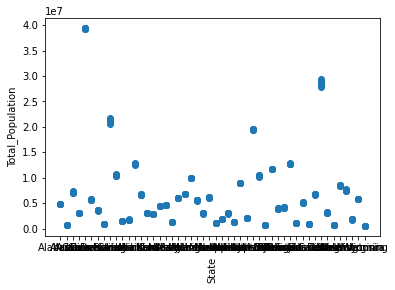

In [50]:
plt.scatter(car_fatality_df.State,car_fatality_df["Total Population"])
plt.xlabel('State')
plt.ylabel('Total_Population')
plt.show()

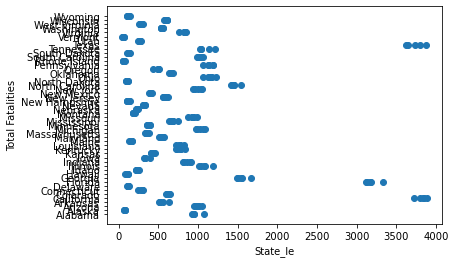

In [51]:
plt.scatter(car_fatality_df['Total Fatalities'], car_fatality_df.State)
plt.xlabel('State_le')
plt.ylabel('Total Fatalities')
plt.show()

In [ ]:
X.describe()

In [ ]:
# Check the balance of our target values
y.value_counts()

In [ ]:
Balanced Random Forest Classifier

In [ ]:
# Initial imports
import pandas as pd
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
# Resample the training data with the BalancedRandomForestClassifier 

In [ ]:
# Calculated the balanced accuracy score

In [ ]:
# Display the confusion matrix

In [ ]:
# Print the imbalanced classification report

In [ ]:
# List the features sorted in descending order by feature importance

In [ ]:
Easy Ensemble AdaBoost Classifier

In [ ]:
# Train the EasyEnsembleClassifier

In [ ]:
# Calculated the balanced accuracy score

In [ ]:
# Display the confusion matrix

In [ ]:
# Print the imbalanced classification report